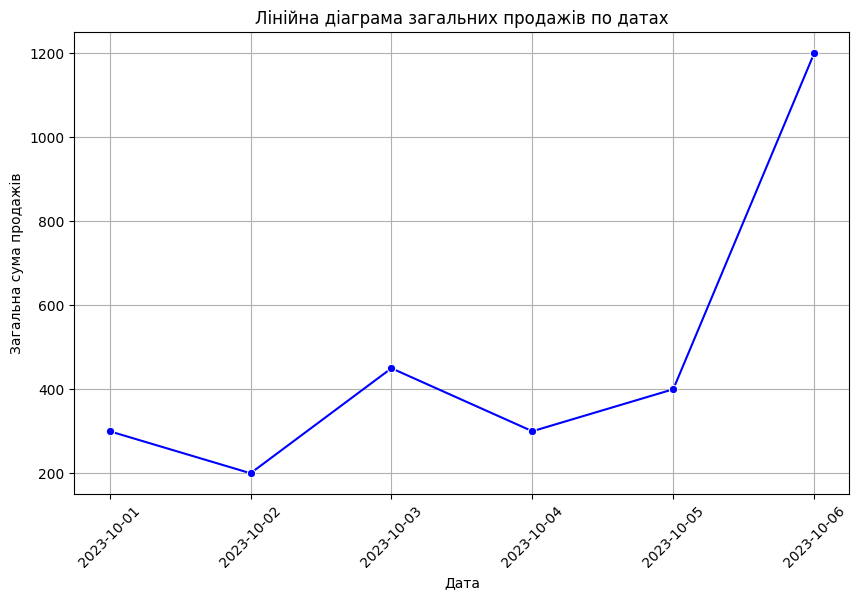

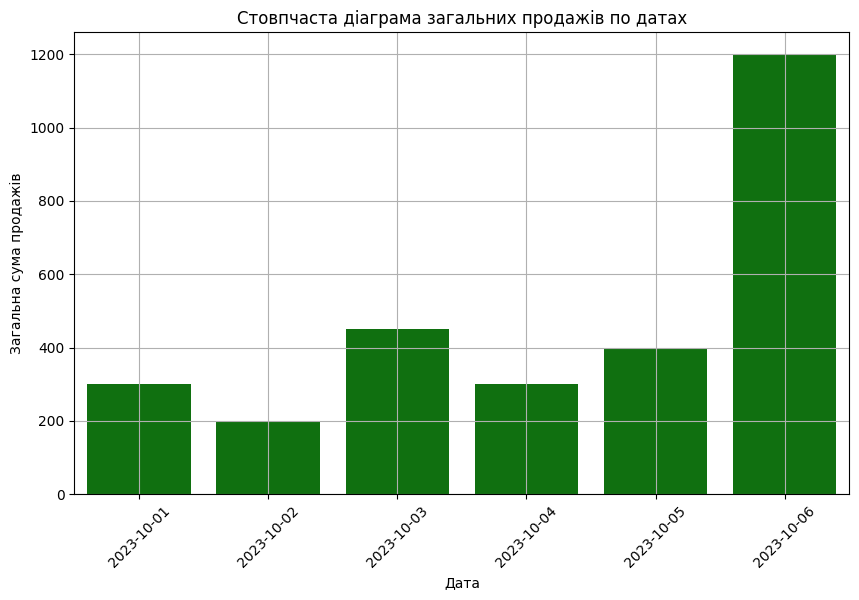

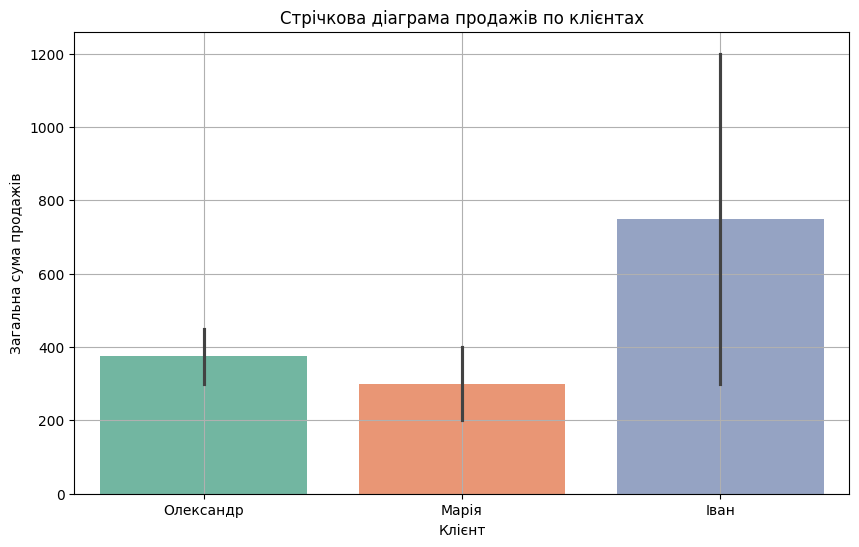

,sale_id,customer_id,product_id,date,quantity,name,region_id,product_name,price,region_name,total_sale
0,1,1,101,2023-10-01,2,Олександр,1,Продукт A,150,Київ,300
1,2,2,102,2023-10-02,1,Марія,2,Продукт B,200,Львів,200
2,3,1,101,2023-10-03,3,Олександр,1,Продукт A,150,Київ,450
3,4,3,103,2023-10-04,1,Іван,1,Продукт C,300,Київ,300
4,5,2,102,2023-10-05,2,Марія,2,Продукт B,200,Львів,400
5,6,3,103,2023-10-06,4,Іван,1,Продукт C,300,Київ,1200


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

# Створення даних для таблиць
customers_data = {
    'customer_id': [1, 2, 3],
    'name': ['Олександр', 'Марія', 'Іван'],
    'region_id': [1, 2, 1]
}
customers = pd.DataFrame(customers_data)

products_data = {
    'product_id': [101, 102, 103],
    'product_name': ['Продукт A', 'Продукт B', 'Продукт C'],
    'price': [150, 200, 300]
}
products = pd.DataFrame(products_data)

regions_data = {
    'region_id': [1, 2],
    'region_name': ['Київ', 'Львів']
}
regions = pd.DataFrame(regions_data)

sales_data = {
    'sale_id': [1, 2, 3, 4, 5, 6],
    'customer_id': [1, 2, 1, 3, 2, 3],
    'product_id': [101, 102, 101, 103, 102, 103],
    'date': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06'],
    'quantity': [2, 1, 3, 1, 2, 4]
}
sales = pd.DataFrame(sales_data)
sales['date'] = pd.to_datetime(sales['date'])  # Перетворення дати

# Злиття таблиць
full_data = pd.merge(sales, customers, on='customer_id', how='left')
full_data = pd.merge(full_data, products, on='product_id', how='left')
full_data = pd.merge(full_data, regions, on='region_id', how='left')
full_data['total_sale'] = full_data['price'] * full_data['quantity']

# Функція для вибору даних по датах
def filter_data_by_date(start_date, end_date):
    return full_data[(full_data['date'] >= start_date) & (full_data['date'] <= end_date)]

# Приклад вибору дати
start_date = pd.to_datetime('2023-10-01')
end_date = pd.to_datetime('2023-10-06')
filtered_data = filter_data_by_date(start_date, end_date)

# Візуалізація лінійної діаграми
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='date', y='total_sale', marker='o', color='blue')
plt.title('Лінійна діаграма загальних продажів по датах')
plt.xlabel('Дата')
plt.ylabel('Загальна сума продажів')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Візуалізація стовпчастої діаграми
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='date', y='total_sale', color='green')
plt.title('Стовпчаста діаграма загальних продажів по датах')
plt.xlabel('Дата')
plt.ylabel('Загальна сума продажів')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Візуалізація стрічкової діаграми (по клієнтах)
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='name', y='total_sale', hue='name', palette='Set2')
plt.title('Стрічкова діаграма продажів по клієнтах')
plt.xlabel('Клієнт')
plt.ylabel('Загальна сума продажів')
plt.grid(True)
plt.show()

# Закладки для деталізації даних
import ipywidgets as widgets
from IPython.display import display

tabs = widgets.Tab()

# Створення таблиць для кожної закладки
sales_tab = widgets.Output()
with sales_tab:
    display(filtered_data)

tabs.children = [sales_tab]
tabs.set_title(0, 'Деталі продажів')
display(tabs)

